## **MSBA CAPSTONE**

### Library Installation and Importation

In [ ]:
! pip install pyldavis
! pip install -U pyldavis

In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, os, time
from itertools import chain
from textblob import TextBlob

In [ ]:
from google.colab import drive
drive.mount('drive')
import os, pandas as pd, numpy as np, matplotlib.pyplot as plt, time
fpath = 'drive/My Drive/MSBA/MSBA_Capstone/'
os.listdir(fpath)

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


['la_clean_data.csv', 'MSBA CAPSTONE.ipynb']

In [ ]:
df= pd.read_csv(fpath + 'la_clean_data.csv', index_col = 0)

### Data Loading and Inspection

In [ ]:
df.shape

(582, 28)

In [ ]:
df.head(100)

,Zip code,numRev,Score,Cleanliness,Comfort,Facilities,Staff,Value for money,Free WiFi,Location,...,Laundry,Pet Friendly,Outdoor Pool,Facilities for Disabled Guests,Bar,Non-smoking Rooms,Terrace,Swimming Pool,24-Hour Front Desk,Dist
name,,,,,,,,,,,,,,,,,,,,,
Sheraton Gateway Los Angeles,90045.0,5663.0,8.1,8.5,8.4,8.0,7.8,7.4,7.2,8.2,...,0,0,0,0,1,1,0,1,0,11.2
The Jeremy Hotel West Hollywood,90069.0,563.0,8.9,9.3,9.0,8.7,8.9,8.2,9.5,9.1,...,0,1,0,0,1,1,0,1,0,8.1
Hampton Inn & Suites Santa Monica,90401.0,867.0,8.3,8.8,8.6,8.2,8.2,7.2,8.4,8.9,...,0,0,0,0,0,0,0,1,0,14.3
"Beverly Wilshire, A Four Seasons Hotel",90212.0,427.0,8.9,9.1,9.0,8.7,9.2,7.6,8.4,9.6,...,0,1,1,0,1,1,0,1,0,8.7
The London West Hollywood at Beverly Hills,90069.0,865.0,8.8,9.2,9.1,8.9,8.9,7.9,8.9,8.9,...,0,1,0,0,1,1,0,1,0,8.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PREMIUM TWO BEDROOM CONDO w Free parking,90012.0,7.0,9.0,9.3,9.3,9.3,8.2,8.9,10.0,8.9,...,0,0,1,0,0,1,0,1,0,1150.0
Downtown LA 5beds Entertainer Pool,90015.0,23.0,8.5,9.0,8.9,8.9,7.8,8.0,9.4,8.8,...,0,0,1,0,0,1,0,1,0,1.1
Le Meridien Delfina Santa Monica,90405.0,893.0,8.0,8.5,8.4,8.0,8.4,6.9,8.1,8.0,...,0,0,1,0,1,1,0,1,0,13.7


In [ ]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Generate summary statistics for numeric columns
summary_table_numeric = {
    'Feature': numeric_columns,
    'Count': df[numeric_columns].count().values,
    'Unique': df[numeric_columns].nunique().values,
    'Mean': df[numeric_columns].mean().values,
    'Std': df[numeric_columns].std().values,
    'Min': df[numeric_columns].min().values,
    '25%': df[numeric_columns].quantile(0.25).values,
    '50%': df[numeric_columns].median().values,
    '75%': df[numeric_columns].quantile(0.75).values,
    'Max': df[numeric_columns].max().values
}

summary_df_numeric = pd.DataFrame(summary_table_numeric)
summary_df_numeric


,Feature,Count,Unique,Mean,Std,Min,25%,50%,75%,Max
0,Zip code,582,59,90118.718213,248.971619,90005.0,90017.000,90028.0,90069.0,91608.0
1,numRev,582,285,370.451890,693.331706,5.0,13.000,37.5,464.0,5880.0
2,Score,582,36,8.381615,0.613465,6.1,8.000,8.4,8.8,10.0
3,Cleanliness,582,37,8.516495,0.710024,6.0,8.100,8.6,9.0,10.0
4,Comfort,582,37,8.478007,0.697942,5.4,8.100,8.5,8.9,10.0
5,Facilities,582,40,8.301890,0.758779,5.6,7.800,8.3,8.8,10.0
6,Staff,582,42,8.433333,0.745443,4.7,8.000,8.5,8.9,10.0
7,Value for money,582,41,7.834536,0.745331,4.3,7.300,7.8,8.3,10.0
8,Free WiFi,582,51,8.546392,1.196141,2.5,8.000,8.7,9.4,10.0
9,Location,582,40,7.928179,1.888664,1.0,7.800,8.6,9.1,10.0


In [ ]:
# Generate summary statistics for numeric columns
summary_table_numeric = {
    'Feature': numeric_columns,
    'Count': df[numeric_columns].count().values,
    'Unique': df[numeric_columns].nunique().values,
    'Mean': df[numeric_columns].mean().values,
    'Std': df[numeric_columns].std().values,
    'Min': df[numeric_columns].min().values,
    '25%': df[numeric_columns].quantile(0.25).values,
    '50%': df[numeric_columns].median().values,
    '75%': df[numeric_columns].quantile(0.75).values,
    'Max': df[numeric_columns].max().values
}

summary_df_numeric = pd.DataFrame(summary_table_numeric)

# Generate summary statistics for all columns, including non-numeric ones
summary_table = {
    'Feature': df.columns,
    'Count': df.count().values,
    'Unique': df.nunique().values,
    'Mean': df.mean(numeric_only=True).reindex(df.columns, fill_value='').values,
    'Std': df.std(numeric_only=True).reindex(df.columns, fill_value='').values,
    'Min': df.min(numeric_only=True).reindex(df.columns, fill_value='').values,
    '25%': df.quantile(0.25, numeric_only=True).reindex(df.columns, fill_value='').values,
    '50%': df.median(numeric_only=True).reindex(df.columns, fill_value='').values,
    '75%': df.quantile(0.75, numeric_only=True).reindex(df.columns, fill_value='').values,
    'Max': df.max(numeric_only=True).reindex(df.columns, fill_value='').values
}

summary_df = pd.DataFrame(summary_table)
print(summary_df)


                           Feature  Count  Unique          Mean         Std  \
0                             name    582     580                             
1                         Zip code    582      59  90118.718213  248.971619   
2                           numRev    582     285     370.45189  693.331706   
3                            Score    582      36      8.381615    0.613465   
4                      Cleanliness    582      37      8.516495    0.710024   
5                          Comfort    582      37      8.478007    0.697942   
6                       Facilities    582      40       8.30189    0.758779   
7                            Staff    582      42      8.433333    0.745443   
8                  Value for money    582      41      7.834536    0.745331   
9                        Free WiFi    582      51      8.546392    1.196141   
10                        Location    582      40      7.928179    1.888664   
11                    Free Parking    582       2   

### Visualizations

<Figure size 1400x800 with 0 Axes>

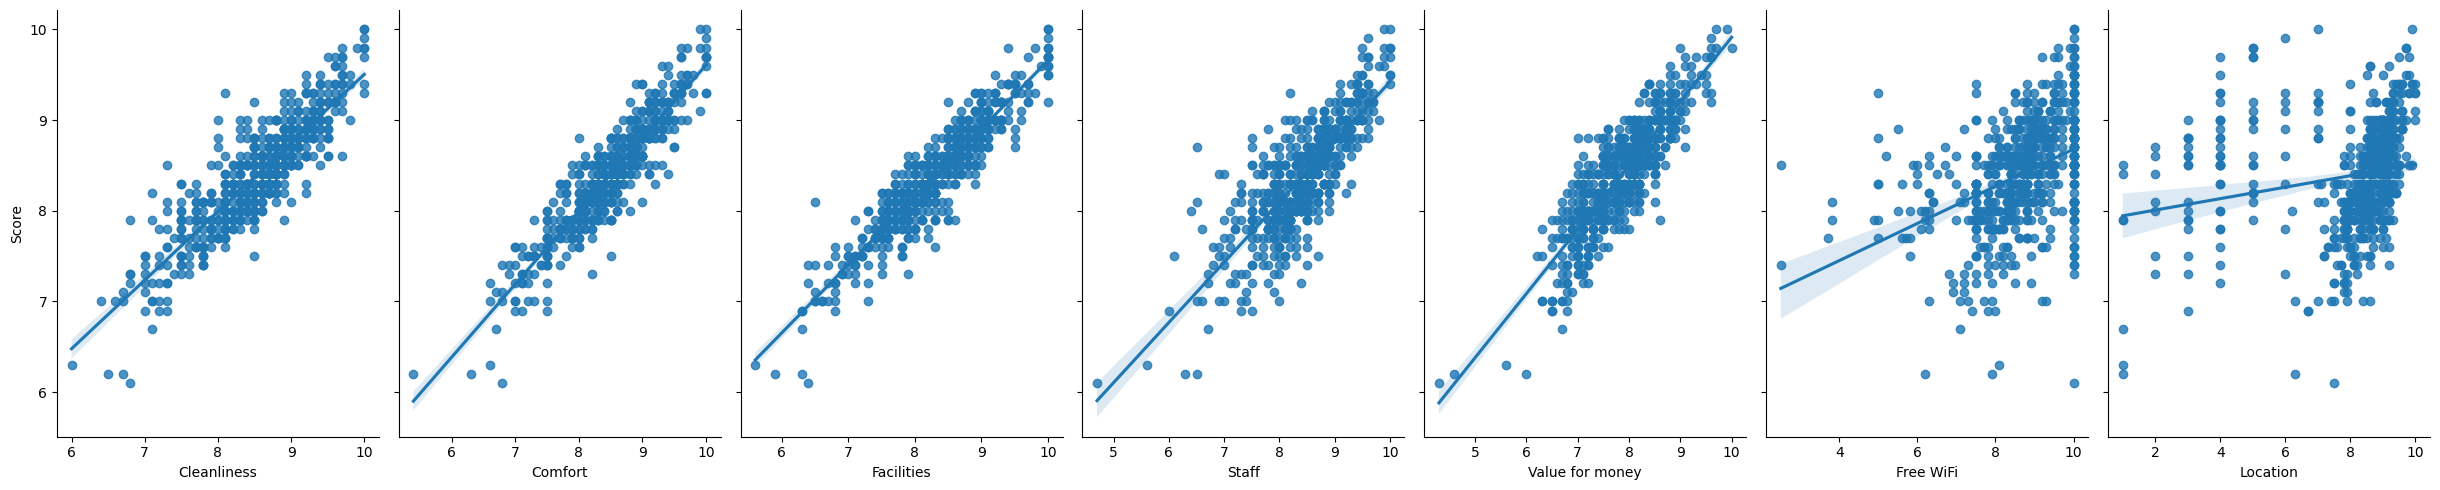

In [ ]:
import seaborn as sns

# Define the numeric columns
numeric_columns = ['Cleanliness', 'Comfort', 'Facilities', 'Staff', 'Value for money', 'Free WiFi', 'Location']

plt.figure(figsize=(14, 8))

sns.pairplot(df, x_vars=numeric_columns, y_vars=['Score'], kind='reg', height=5, aspect=0.7)

plt.tight_layout()
plt.show()


<Figure size 1400x800 with 0 Axes>

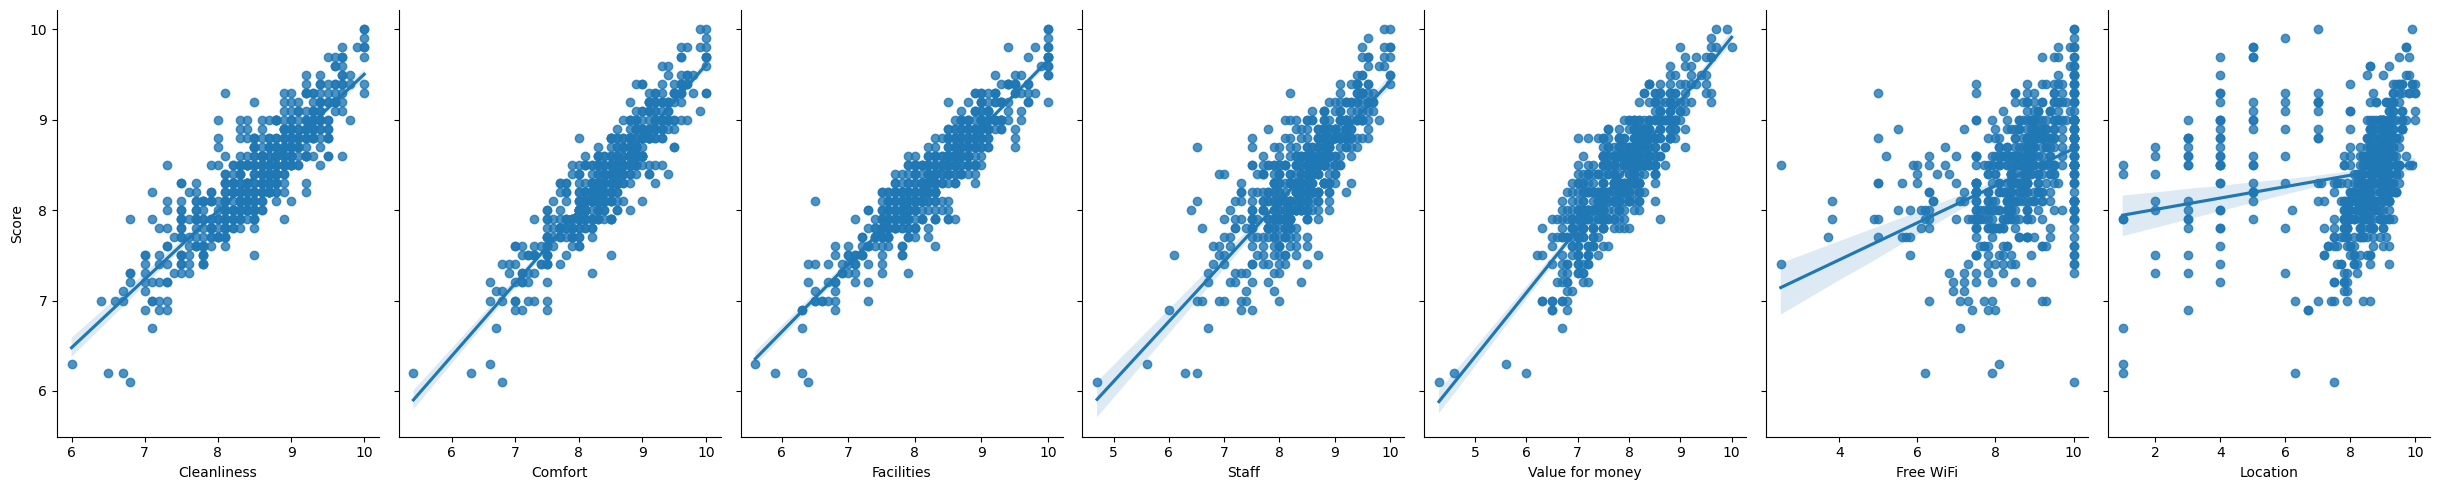

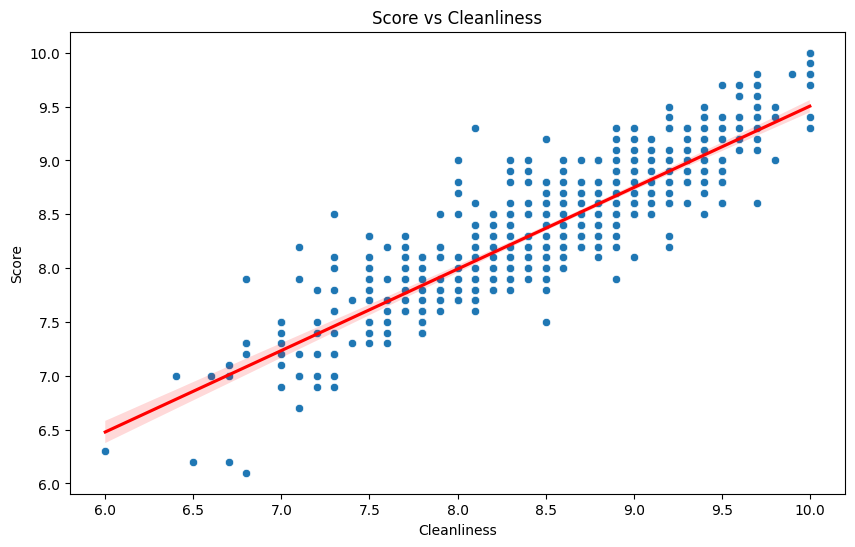

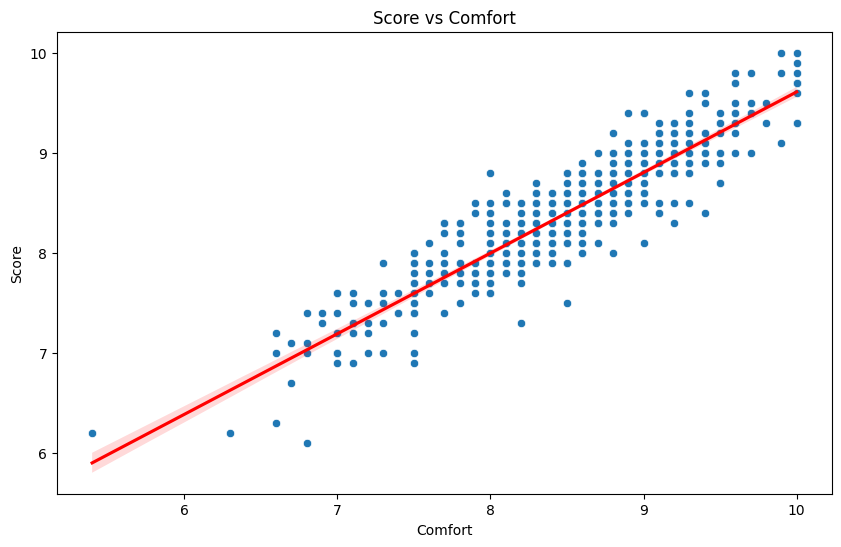

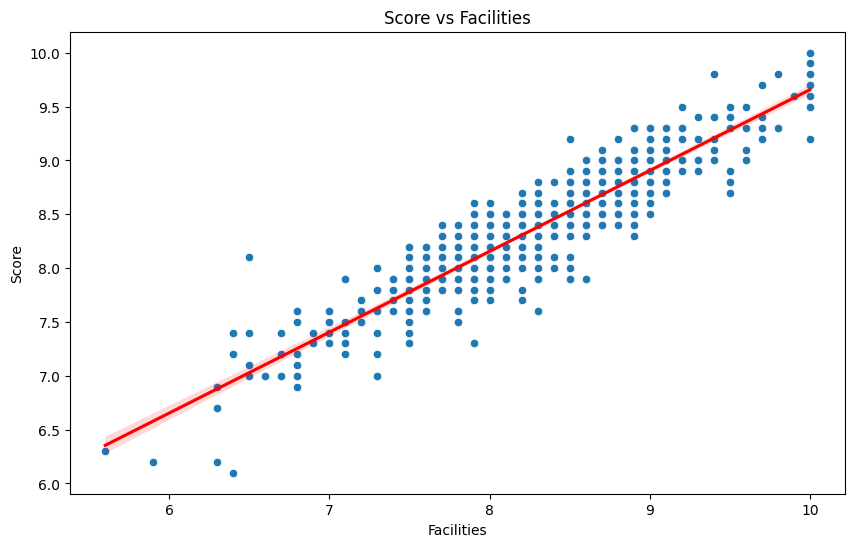

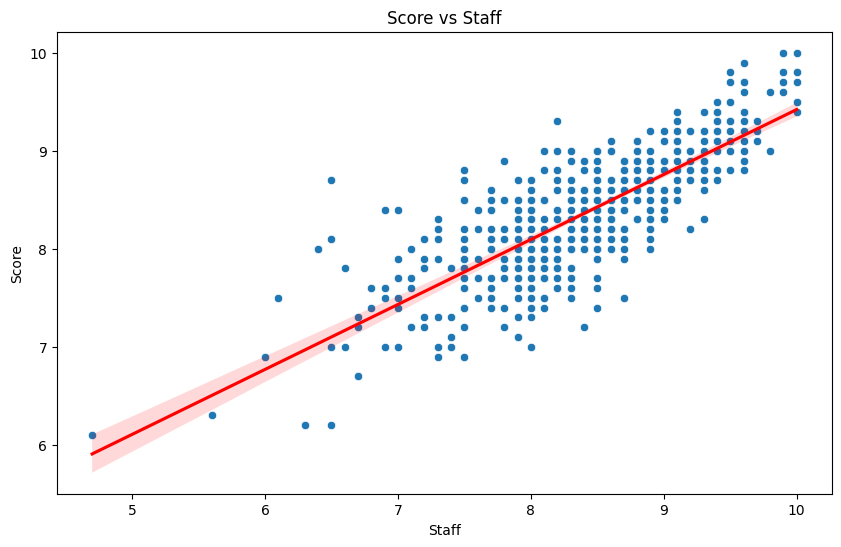

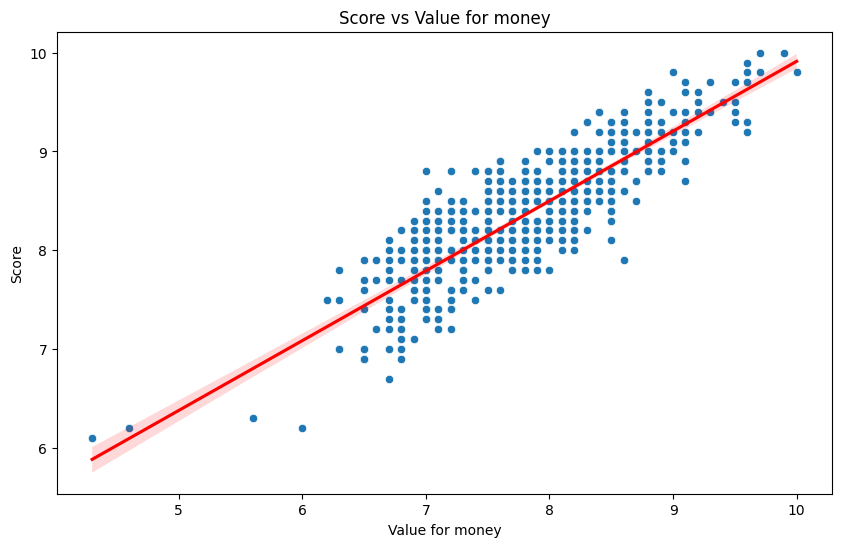

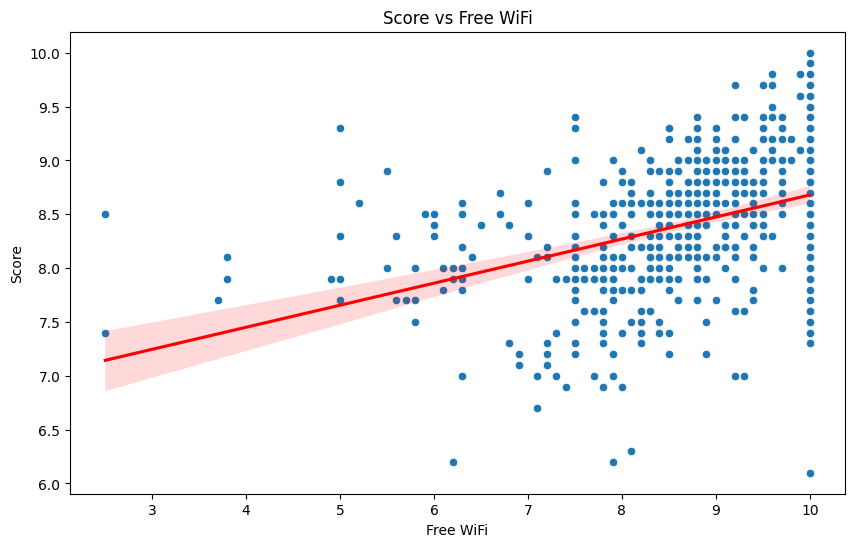

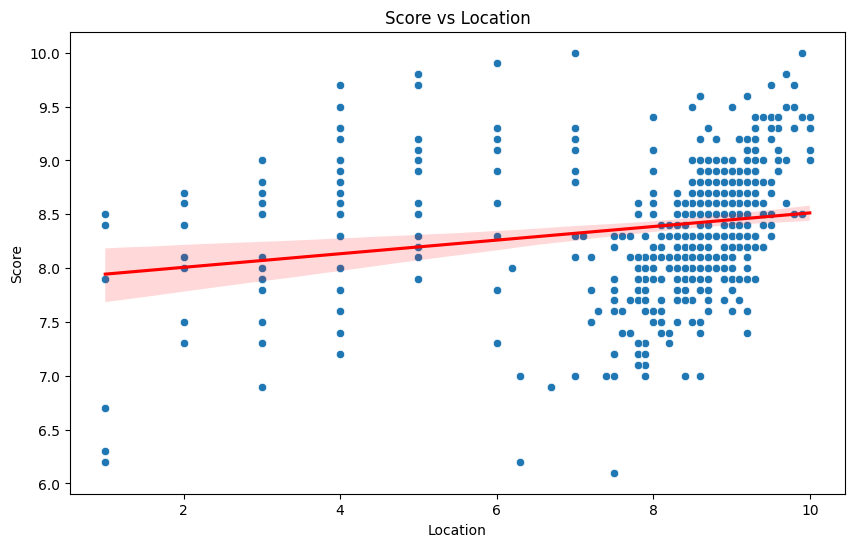

In [ ]:

numeric_columns = ['Cleanliness', 'Comfort', 'Facilities', 'Staff', 'Value for money', 'Free WiFi', 'Location']

plt.figure(figsize=(14, 8))

sns.pairplot(df, x_vars=numeric_columns, y_vars=['Score'], kind='reg', height=5, aspect=0.7)

plt.tight_layout()
plt.show()

# Create individual plots for better visibility
for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=col, y='Score')
    sns.regplot(data=df, x=col, y='Score', scatter=False, color='red')
    plt.title(f'Score vs {col}')
    plt.show()


### Modeling

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define independent and dependent variables
X = df[['Cleanliness', 'Comfort', 'Facilities', 'Staff', 'Value for money',
        'Free WiFi', 'Location', 'Free Parking', 'On-site Parking', 'Fitness Center',
        'Family Rooms', 'Laundry', 'Pet Friendly', 'Outdoor Pool',
        'Facilities for Disabled Guests', 'Bar', 'Non-smoking Rooms', 'Terrace',
        'Swimming Pool', '24-Hour Front Desk', 'Dist']]
y = df['Score']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)
print(f'Intercept: {model.intercept_}')


Mean Squared Error: 0.00760100981823251
R-squared: 0.9808460093511432
                                Coefficient
Cleanliness                        0.165813
Comfort                            0.198970
Facilities                         0.183784
Staff                              0.176065
Value for money                    0.185107
Free WiFi                          0.014496
Location                           0.010067
Free Parking                       0.010754
On-site Parking                   -0.004524
Fitness Center                     0.004527
Family Rooms                      -0.006046
Laundry                            0.009947
Pet Friendly                       0.015163
Outdoor Pool                       0.004572
Facilities for Disabled Guests    -0.026063
Bar                                0.013619
Non-smoking Rooms                 -0.018783
Terrace                           -0.002140
Swimming Pool                     -0.020742
24-Hour Front Desk                -0.042261
Dist  

In [ ]:
# Selecting the top 3 most important variables
top_3_variables = ['Comfort', 'Facilities', 'Value for money']

# Define independent variables
X_top_3 = df[top_3_variables]
y = df['Score']

# Split data into training and testing sets
X_train_top_3, X_test_top_3, y_train, y_test = train_test_split(X_top_3, y, test_size=0.2, random_state=42)

# Initialize linear regression model
model_top_3 = LinearRegression()

# Fit the model on the training data
model_top_3.fit(X_train_top_3, y_train)

# Predictions on the test data
y_pred_top_3 = model_top_3.predict(X_test_top_3)

# Evaluate the model
mse_top_3 = mean_squared_error(y_test, y_pred_top_3)
r2_top_3 = r2_score(y_test, y_pred_top_3)

print(f'Mean Squared Error (Top 3 variables): {mse_top_3}')
print(f'R-squared (Top 3 variables): {r2_top_3}')


Mean Squared Error (Top 3 variables): 0.02603462820023189
R-squared (Top 3 variables): 0.9343946347895046


## **Model Development**


In [ ]:
# Model Test

y = df['Score']  # Dependent variable
X = df['Cleanliness']  # Independent variable

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     1902.
Date:                Tue, 06 Aug 2024   Prob (F-statistic):          2.99e-185
Time:                        03:33:14   Log-Likelihood:                -117.88
No. Observations:                 582   AIC:                             239.8
Df Residuals:                     580   BIC:                             248.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.9402      0.148     13.091      

In [ ]:
## Model 1
df['intercept'] = 1

# Define the independent variables (Cleanliness, Comfort) and the dependent variable (Score)
X = df[['intercept', 'Cleanliness', 'Comfort']]
y = df['Score']

# Fit the regression model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     2293.
Date:                Tue, 06 Aug 2024   Prob (F-statistic):          7.03e-276
Time:                        03:10:45   Log-Likelihood:                 95.908
No. Observations:                 582   AIC:                            -185.8
Df Residuals:                     579   BIC:                            -172.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       1.0747      0.108      9.916      

In [ ]:
## Model 2
df['intercept'] = 1

X = df[['intercept', 'Cleanliness', 'Comfort', 'Facilities', 'Staff', 'Value for money']]
y = df['Score']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     4644.
Date:                Tue, 06 Aug 2024   Prob (F-statistic):               0.00
Time:                        03:10:45   Log-Likelihood:                 541.93
No. Observations:                 582   AIC:                            -1072.
Df Residuals:                     576   BIC:                            -1046.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept           0.6345      0.053     

In [ ]:
## Model 3
df['intercept'] = 1

X = df[['intercept', 'Cleanliness', 'Comfort', 'Facilities', 'Staff', 'Value for money', 'Free WiFi', 'Location']]
y = df['Score']

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     3482.
Date:                Tue, 06 Aug 2024   Prob (F-statistic):               0.00
Time:                        03:44:54   Log-Likelihood:                 556.66
No. Observations:                 582   AIC:                            -1097.
Df Residuals:                     574   BIC:                            -1062.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept           0.5631      0.054     

### Regression Models Tables



In [ ]:

# Define data for Model 1
model_1_data = {
    'Feature': ['Intercept', 'Cleanliness', 'Comfort'],
    'Coefficient': [1.0747, 0.3258, 0.5346],
    'Std. Error': [0.1080, 0.0210, 0.0210],
    't-statistic': [9.916, 15.537, 25.061],
    'p-value': [0.000, 0.000, 0.000]
}

# Define data for Model 2
model_2_data = {
    'Feature': ['Intercept', 'Cleanliness', 'Comfort', 'Facilities', 'Staff', 'Value for money'],
    'Coefficient': [0.6345, 0.1660, 0.2058, 0.1938, 0.1841, 0.1823],
    'Std. Error': [0.0530, 0.0110, 0.0140, 0.0130, 0.0080, 0.0090],
    't-statistic': [11.969, 15.166, 14.728, 15.095, 23.233, 19.484],
    'p-value': [0.000, 0.000, 0.000, 0.000, 0.000, 0.000]
}

# Define data for Model 3
model_3_data = {
    'Feature': ['Intercept', 'Cleanliness', 'Comfort', 'Facilities', 'Staff', 'Value for money', 'Free WiFi', 'Location'],
    'Coefficient': [0.5631, 0.1647, 0.2047, 0.1912, 0.1802, 0.1766, 0.0144, 0.0084],
    'Std. Error': [0.0540, 0.0110, 0.0140, 0.0130, 0.0080, 0.0090, 0.0040, 0.0020],
    't-statistic': [10.512, 15.360, 14.989, 15.189, 22.668, 18.887, 3.960, 3.900],
    'p-value': [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000]
}

# Create DataFrames
df_model_1 = pd.DataFrame(model_1_data)
df_model_2 = pd.DataFrame(model_2_data)
df_model_3 = pd.DataFrame(model_3_data)

# Function to format the table
def format_table(df):
    df_formatted = df.copy()

    # Round numbers appropriately
    df_formatted['Coefficient'] = df_formatted['Coefficient'].apply(lambda x: f'{x:.4f}')
    df_formatted['Std. Error'] = df_formatted['Std. Error'].apply(lambda x: f'({x:.4f})')
    df_formatted['t-statistic'] = df_formatted['t-statistic'].apply(lambda x: f'{x:.3f}')
    df_formatted['p-value'] = df_formatted['p-value'].apply(lambda x: f'{x:.3f}')

    # Add asterisks for significance
    alpha = 0.05
    df_formatted['Significance'] = df_formatted['p-value'].apply(lambda x: '***' if float(x) < alpha else '')

    return df_formatted

# Format tables
df_model_1_formatted = format_table(df_model_1)
df_model_2_formatted = format_table(df_model_2)
df_model_3_formatted = format_table(df_model_3)


print("Model 1:")
print(df_model_1_formatted)
print("\nModel 2:")
print(df_model_2_formatted)
print("\nModel 3:")
print(df_model_3_formatted)


Model 1:
       Feature Coefficient Std. Error t-statistic p-value Significance
0    Intercept      1.0747   (0.1080)       9.916   0.000          ***
1  Cleanliness      0.3258   (0.0210)      15.537   0.000          ***
2      Comfort      0.5346   (0.0210)      25.061   0.000          ***

Model 2:
           Feature Coefficient Std. Error t-statistic p-value Significance
0        Intercept      0.6345   (0.0530)      11.969   0.000          ***
1      Cleanliness      0.1660   (0.0110)      15.166   0.000          ***
2          Comfort      0.2058   (0.0140)      14.728   0.000          ***
3       Facilities      0.1938   (0.0130)      15.095   0.000          ***
4            Staff      0.1841   (0.0080)      23.233   0.000          ***
5  Value for money      0.1823   (0.0090)      19.484   0.000          ***

Model 3:
           Feature Coefficient Std. Error t-statistic p-value Significance
0        Intercept      0.5631   (0.0540)      10.512   0.000          ***
1      Clean